# Schelling's Model of Segregation

Racial segregation has always been a pernicious social problem in the United States. Although much effort has been extended to desegregate our schools, churches, and neighborhoods, the US continues to remain segregated by race and economic lines. Why is segregation such a difficult problem to eradicate?

In 1971, the American economist Thomas Schelling created an agent-based model that might help explain why segregation is so difficult to combat. His model of segregation showed that even when individuals (or "agents") didn't mind being surrounded or living by agents of a different race, they would still choose to segregate themselves from other agents over time! Although the model is quite simple, it gives a fascinating look at how individuals might self-segregate, even when they have no explicit desire to do so.

In this assignment, we will create a simulation of Schelling's model. The user should be able to set a number of parameters of the model and watch it go.\[ Ref: http://nifty.stanford.edu/2014/mccown-schelling-model-segregation/ \]

In [1]:
from numpy import array
import random as ran
import numpy as np

def CreateGrid(shape, share_red , share_blue):    
    if(share_red+share_blue<1):
        share_empty=1-(share_red+share_blue)
        arr_random=np.random.choice([0,1,2],(shape,shape),p=[share_empty,share_red,share_blue])
    return arr_random

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def visualize(grid):
    
    mapcolor = mpl.colors.ListedColormap(['w','r','b'])
    mapcolor.set_over('2')
    mapcolor.set_under('0')

    plt.imshow(grid,cmap=mapcolor)   
    plt.show()

In [3]:
import random

#identifying the location of empty slots in grid
def empty_slots(grid):
    result = np.where(grid == 0)
    empty_list = list(zip(result[0], result[1]))
    return empty_list

In [4]:
#method to simulate movement of single agent to a empty slot when it doesn't meet PP
#written in a way to reuse the method for multiple steps agent movement
#returns a flag that indicates if the current agent has moved in the grid after the simulate
def simulate_single(grid, pp):
    
    empty_list = empty_slots(grid)
    changes_happened = False;
    for (i, j), value in np.ndenumerate(grid):
    
            current_agent = grid[i][j]
            same_counter = 0;
            diff_counter = 0;
            empty_agent = 0;
            
            #continue if the selected grid location is an empty slot
            if grid[i][j] == 0:
                continue;
            
            #conditions checking the surrounding vertices for a given agent - 8 at max, 3 near the edges.
            #inner if to check if the agent matches the neighbouring agent
            #inner else to check if the neighbouring agent is not an empty agent
            
            if i > 0 and j > 0:
                if grid[i-1][j-1] == current_agent:
                    same_counter+=1;
                elif grid[i-1][j-1] != empty_agent:
                    diff_counter+=1;
                    
            if i > 0:
                if grid[i-1][j] == current_agent:
                    same_counter+=1;
                elif grid[i-1][j] != empty_agent:
                    diff_counter+=1;
            
            if j > 0:
                if grid[i][j-1] == current_agent:
                    same_counter+=1;
                elif grid[i][j-1] != empty_agent:
                    diff_counter+=1;
                   
            if i < (grid.shape[0]-1) and j > 0:
                if grid[i+1][j-1] == current_agent:
                    same_counter+=1;
                elif grid[i+1][j-1] != empty_agent:
                    diff_counter+=1;
                           
            if i < (grid.shape[0]-1):
                if grid[i+1][j] == current_agent:
                    same_counter+=1;
                elif grid[i+1][j] != empty_agent:
                    diff_counter+=1;
                    
            if i > 0 and j < (grid.shape[1]-1):
                if grid[(i-1,j+1)] == current_agent:
                    same_counter += 1
                elif grid[(i-1,j+1)] != empty_agent:
                    diff_counter += 1
                    
            if j < (grid.shape[1]-1):
                if grid[(i,j+1)] == current_agent:
                    same_counter += 1
                elif grid[(i,j+1)] != empty_agent:
                    diff_counter += 1
                    
            if i < (grid.shape[0]-1) and j < (grid.shape[1]-1):
                if grid[(i+1,j+1)] == current_agent:
                    same_counter += 1
                elif grid[(i+1,j+1)] != empty_agent:
                    diff_counter += 1            
            
            #happens if the agent is an empty agent
            if(same_counter+diff_counter == 0):
                continue;
            
            #compare the pp value against the obtained ratio
            elif(float(same_counter)/(same_counter+diff_counter) < pp):
                
                #picking an empty spot and replacing it with current agent
                #adding current agent location to empty slot
                rand = random.randint(0,(len(empty_list)-1))
                index = empty_list[rand]     
                grid[index[0]][index[1]] = grid[i][j]
                grid[i][j] = 0
                del empty_list[rand]
                empty_list.append((i,j))
                changes_happened = True;
                
    return changes_happened;

In [5]:
#method to simulate number of given steps, or till there is no changes for specified number of steps
def simulate(grid, preferred_proportion, max_steps, no_changes_threshold, iterations_to_next_visualization):
    no_changes_count = 0;
    for i in range(max_steps):
        
        #counter update - to check if there is any changes made after the simulate
        if(simulate_single(grid, preferred_proportion)==False):
            no_changes_count+=1
        else:
            no_changes_count=0
    
        #to see if there is no changes happening for a specified number of steps
        if(no_changes_count == no_changes_threshold):
            #print("Maximum no change steps reached")
            break;
            
        #to generate a grid visualization after specified number of iterations
        if((i+1)%iterations_to_next_visualization == 0):
            visualize(grid)
            
    return grid

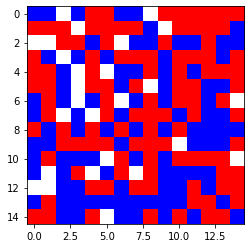

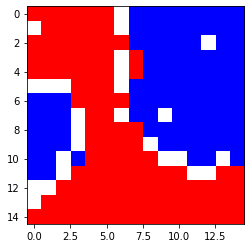

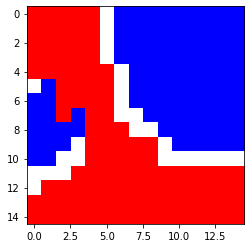

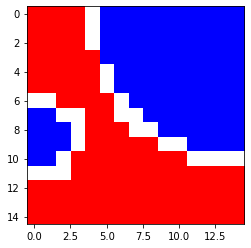

Result


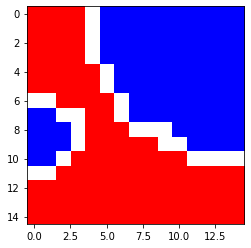

In [6]:
grid=CreateGrid(shape = 15, share_red = 0.45, share_blue = 0.45)
visualize(grid)

seg_grid = simulate(grid, preferred_proportion = .7, max_steps = 500, no_changes_threshold = 5, iterations_to_next_visualization = 10)

print("Result")
visualize(seg_grid)